## Import the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the data set

In [2]:
df = pd.read_csv('Absenteeism_preprocessed1.csv')

In [3]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,month,Day of year,Day of week
0,0,0,0,1,289,36,33,239.554,30,0,2,1,4,7,188,1
1,0,0,0,0,118,13,50,239.554,31,0,1,0,0,7,195,1
2,0,0,0,1,179,51,38,239.554,31,0,0,0,2,7,196,2
3,1,0,0,0,279,5,39,239.554,24,0,2,0,4,7,197,3
4,0,0,0,1,289,36,33,239.554,30,0,2,1,2,7,204,3


In [4]:
df['Education'].nunique()

2

## Targets

In [5]:
df['Absenteeism Time in Hours'].median()

3.0

**If Values is >3 then targe is 1 or else 0**

In [6]:
targets= np.where(df['Absenteeism Time in Hours']>3,0,1)

In [7]:
df['Excessive Absentees']=targets

In [8]:
df=df.drop('Absenteeism Time in Hours',axis=1)

In [9]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,month,Day of year,Day of week,Excessive Absentees
0,0,0,0,1,289,36,33,239.554,30,0,2,1,7,188,1,0
1,0,0,0,0,118,13,50,239.554,31,0,1,0,7,195,1,1
2,0,0,0,1,179,51,38,239.554,31,0,0,0,7,196,2,1
3,1,0,0,0,279,5,39,239.554,24,0,2,0,7,197,3,0
4,0,0,0,1,289,36,33,239.554,30,0,2,1,7,204,3,1


In [10]:
df['Excessive Absentees'].value_counts()

1    381
0    319
Name: Excessive Absentees, dtype: int64

## Splitting the data

In [11]:
X= df.drop('Excessive Absentees',axis=1)
y= df['Excessive Absentees']

In [12]:
X.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,month,Day of year,Day of week
0,0,0,0,1,289,36,33,239.554,30,0,2,1,7,188,1
1,0,0,0,0,118,13,50,239.554,31,0,1,0,7,195,1
2,0,0,0,1,179,51,38,239.554,31,0,0,0,7,196,2
3,1,0,0,0,279,5,39,239.554,24,0,2,0,7,197,3
4,0,0,0,1,289,36,33,239.554,30,0,2,1,7,204,3


In [13]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Excessive Absentees, dtype: int32

In [14]:
from scipy import stats
df[(np.abs(stats.zscore(df))<3).all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reason_1                 700 non-null    int64  
 1   Reason_2                 700 non-null    int64  
 2   Reason_3                 700 non-null    int64  
 3   Reason_4                 700 non-null    int64  
 4   Transportation Expense   700 non-null    int64  
 5   Distance to Work         700 non-null    int64  
 6   Age                      700 non-null    int64  
 7   Daily Work Load Average  700 non-null    float64
 8   Body Mass Index          700 non-null    int64  
 9   Education                700 non-null    int64  
 10  Children                 700 non-null    int64  
 11  Pets                     700 non-null    int64  
 12  month                    700 non-null    int64  
 13  Day of year              700 non-null    int64  
 14  Day of week              7

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing Data

In [17]:
from sklearn.preprocessing import StandardScaler
Sc= StandardScaler()

In [18]:
X_train= Sc.fit_transform(X_train)
X_test= Sc.transform(X_test)

## ML Model

### RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier 
M1= RandomForestClassifier()

In [20]:
M1.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
M1.feature_importances_

array([0.07350272, 0.00115389, 0.03826456, 0.06136404, 0.09368437,
       0.05411938, 0.05516793, 0.14859435, 0.05967823, 0.01198871,
       0.04146536, 0.02276862, 0.09045093, 0.15844466, 0.08935225])

In [22]:
a=df.columns

In [23]:
feature_imp = pd.DataFrame(M1.feature_importances_,index=a[0:15] )
feature_imp

,0
Reason_1,0.073503
Reason_2,0.001154
Reason_3,0.038265
Reason_4,0.061364
Transportation Expense,0.093684
Distance to Work,0.054119
Age,0.055168
Daily Work Load Average,0.148594
Body Mass Index,0.059678
Education,0.011989


In [24]:
P1=M1.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,accuracy_score
print(classification_report(y_test,P1))
print('\n')
print(confusion_matrix(y_test, P1))
print('\n')
print(accuracy_score(y_test, P1))
print('\n')
accuracy = accuracy_score(y_test, P1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P1))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        58
           1       0.81      0.79      0.80        82

    accuracy                           0.77       140
   macro avg       0.76      0.77      0.77       140
weighted avg       0.77      0.77      0.77       140



[[43 15]
 [17 65]]


0.7714285714285715


Accuracy: 77.14%
ROC AUC Score 0.7670311185870481


### Predictions and Evaluations From Top feature

In [26]:
from sklearn.feature_selection import RFE

In [27]:
M2 = RFE(M1,n_features_to_select=4)

In [28]:
M2.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=4)

In [29]:
P2=M2.predict(X_test)

In [30]:
print(classification_report(y_test,P2))
print('\n')
print(confusion_matrix(y_test, P2))
print('\n')
print(accuracy_score(y_test, P2))
print('\n')
accuracy = accuracy_score(y_test, P2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P2))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.65      0.60      0.62        58
           1       0.73      0.77      0.75        82

    accuracy                           0.70       140
   macro avg       0.69      0.69      0.69       140
weighted avg       0.70      0.70      0.70       140



[[35 23]
 [19 63]]


0.7


Accuracy: 70.00%
ROC AUC Score 0.6858704793944491


## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
M3=DecisionTreeClassifier()

In [32]:
M3.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
P3= M3.predict(X_test)

In [34]:
print(classification_report(y_test,P3))
print('\n')
print(confusion_matrix(y_test, P3))
print('\n')
print(accuracy_score(y_test, P3))
print('\n')
accuracy = accuracy_score(y_test, P3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P3))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.71      0.64      0.67        58
           1       0.76      0.82      0.79        82

    accuracy                           0.74       140
   macro avg       0.74      0.73      0.73       140
weighted avg       0.74      0.74      0.74       140



[[37 21]
 [15 67]]


0.7428571428571429


Accuracy: 74.29%
ROC AUC Score 0.727502102607233


## Support Vector Machine

In [35]:
from sklearn.svm import SVC

In [36]:
M4= SVC()

In [37]:
M4.fit(X_train,y_train)

SVC()

In [38]:
P4= M4.predict(X_test)

In [39]:
print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test, P4))
print('\n')
print(accuracy_score(y_test, P4))
print('\n')
accuracy = accuracy_score(y_test, P4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P4))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        58
           1       0.82      0.78      0.80        82

    accuracy                           0.77       140
   macro avg       0.77      0.77      0.77       140
weighted avg       0.77      0.77      0.77       140



[[44 14]
 [18 64]]


0.7714285714285715


Accuracy: 77.14%
ROC AUC Score 0.7695542472666106


### Gridsearch

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'C': [0.1,1, 10, 100, 1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

In [42]:
gr=GridSearchCV(SVC(),param_grid)

In [43]:
gr.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [44]:
gr.best_estimator_

SVC(C=1000, gamma=0.001)

In [45]:
P4=gr.predict(X_test)

In [46]:
print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test, P4))
print('\n')
print(accuracy_score(y_test, P4))
print('\n')
accuracy = accuracy_score(y_test, P4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P4))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        58
           1       0.81      0.79      0.80        82

    accuracy                           0.77       140
   macro avg       0.76      0.77      0.77       140
weighted avg       0.77      0.77      0.77       140



[[43 15]
 [17 65]]


0.7714285714285715


Accuracy: 77.14%
ROC AUC Score 0.7670311185870481


## Naive Bayes classifier

In [47]:
from sklearn.naive_bayes import GaussianNB
M5=GaussianNB()

In [48]:
M5.fit(X_train,y_train)

GaussianNB()

In [49]:
P5=M5.predict(X_test)

In [50]:
print(classification_report(y_test,P5))
print('\n')
print(confusion_matrix(y_test, P5))
print('\n')
print(accuracy_score(y_test, P5))
print('\n')
accuracy = accuracy_score(y_test, P5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P5))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.71      0.64      0.67        58
           1       0.76      0.82      0.79        82

    accuracy                           0.74       140
   macro avg       0.74      0.73      0.73       140
weighted avg       0.74      0.74      0.74       140



[[37 21]
 [15 67]]


0.7428571428571429


Accuracy: 74.29%
ROC AUC Score 0.727502102607233


## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
error_Mat=[]
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))

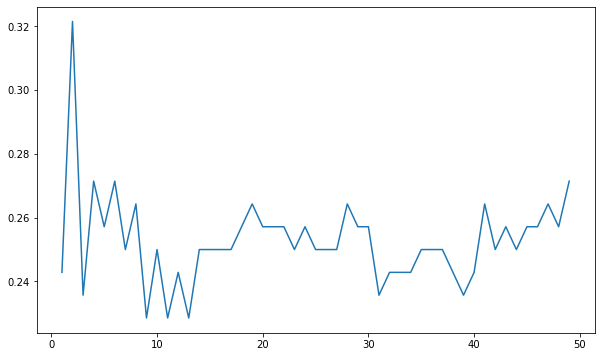

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range (1,50),error_Mat)

In [54]:
M6= KNeighborsClassifier(n_neighbors=9)

In [55]:
M6.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [56]:
P6=M6.predict(X_test)

In [57]:
print(classification_report(y_test,P6))
print('\n')
print(confusion_matrix(y_test, P6))
print('\n')
print(accuracy_score(y_test, P6))
print('\n')
accuracy = accuracy_score(y_test, P6)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P6))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        58
           1       0.80      0.80      0.80        82

    accuracy                           0.77       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.77      0.77      0.77       140



[[42 16]
 [16 66]]


0.7714285714285715


Accuracy: 77.14%
ROC AUC Score 0.7645079899074853


## LogisticRegression

In [58]:
from sklearn.linear_model import LogisticRegression
M7= LogisticRegression()

In [59]:
M7.fit(X_train,y_train)

LogisticRegression()

In [60]:
P7 = M7.predict(X_test)

In [61]:
print(classification_report(y_test,P7))
print('\n')
print(confusion_matrix(y_test, P7))
print('\n')
print(accuracy_score(y_test, P7))
print('\n')
accuracy = accuracy_score(y_test, P7)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P7))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.70      0.69      0.70        58
           1       0.78      0.79      0.79        82

    accuracy                           0.75       140
   macro avg       0.74      0.74      0.74       140
weighted avg       0.75      0.75      0.75       140



[[40 18]
 [17 65]]


0.75


Accuracy: 75.00%
ROC AUC Score 0.7411690496215307


## GB Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
M8=GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=2)

In [64]:
M8.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2)

In [65]:
P8=M8.predict(X_test)

In [66]:
print(classification_report(y_test,P8))
print('\n')
print(confusion_matrix(y_test, P8))
print('\n')
print(accuracy_score(y_test, P8))
print('\n')
accuracy = accuracy_score(y_test, P8)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P8))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        58
           1       0.82      0.79      0.81        82

    accuracy                           0.78       140
   macro avg       0.77      0.78      0.77       140
weighted avg       0.78      0.78      0.78       140



[[44 14]
 [17 65]]


0.7785714285714286


Accuracy: 77.86%
ROC AUC Score 0.7756518082422204


## Histogram Boosting Classifier

In [67]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [68]:
M9= HistGradientBoostingClassifier()

In [69]:
M9.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [70]:
P9=M9.predict(X_test)

In [71]:
print(classification_report(y_test,P9))
print('\n')
print(confusion_matrix(y_test, P9))
print('\n')
print(accuracy_score(y_test, P9))
print('\n')
accuracy = accuracy_score(y_test, P9)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P9))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        58
           1       0.80      0.85      0.83        82

    accuracy                           0.79       140
   macro avg       0.79      0.78      0.78       140
weighted avg       0.79      0.79      0.79       140



[[41 17]
 [12 70]]


0.7928571428571428


Accuracy: 79.29%
ROC AUC Score 0.7802775441547518


## XGB Boosting

In [72]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [73]:
M10=XGBClassifier()

In [74]:
from sklearn.model_selection import KFold , cross_val_score

In [75]:
kfold= KFold(n_splits=6, shuffle=False, random_state=None)
scores= cross_val_score(M10, X_train, y_train, cv=kfold,verbose=False)

[12:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [76]:
scores

array([0.68085106, 0.74468085, 0.8172043 , 0.6344086 , 0.67741935,
       0.72043011])

In [77]:
M10.fit(X_train,y_train)

[12:31:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
P10= M10.predict(X_test)

In [79]:
print(classification_report(y_test,P10))
print('\n')
print(confusion_matrix(y_test, P10))
print('\n')
print(accuracy_score(y_test, P10))
print('\n')
accuracy = accuracy_score(y_test, P10)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P10))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        58
           1       0.82      0.77      0.79        82

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.77      0.76      0.77       140



[[44 14]
 [19 63]]


0.7642857142857142


Accuracy: 76.43%
ROC AUC Score 0.7634566862910008


## Light GBM

In [80]:
from lightgbm import LGBMClassifier

In [81]:
M11=LGBMClassifier()

In [82]:
Kfold=KFold(n_splits=5, shuffle=False, random_state=None)
score=cross_val_score(M11,X_train,y_train,cv=Kfold)
score

array([0.70535714, 0.77678571, 0.71428571, 0.65178571, 0.73214286])

In [83]:
M11.fit(X_train,y_train)

LGBMClassifier()

In [84]:
P11=M11.predict(X_test)

In [85]:
print(classification_report(y_test,P11))
print('\n')
print(confusion_matrix(y_test, P11))
print('\n')
print(accuracy_score(y_test, P11))
print('\n')
accuracy = accuracy_score(y_test, P11)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P11))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        58
           1       0.80      0.87      0.83        82

    accuracy                           0.79       140
   macro avg       0.79      0.78      0.78       140
weighted avg       0.79      0.79      0.79       140



[[40 18]
 [11 71]]


0.7928571428571428


Accuracy: 79.29%
ROC AUC Score 0.7777544154751892


## CAT Boosting

In [86]:
from catboost import CatBoostClassifier

In [87]:
M12= CatBoostClassifier()

In [88]:
score=cross_val_score(M12,X_train,y_train,cv=kfold,verbose=False)

Learning rate set to 0.007436
0:	learn: 0.6901059	total: 144ms	remaining: 2m 24s
1:	learn: 0.6884987	total: 148ms	remaining: 1m 13s
2:	learn: 0.6861318	total: 153ms	remaining: 50.9s
3:	learn: 0.6836163	total: 162ms	remaining: 40.3s
4:	learn: 0.6811434	total: 166ms	remaining: 33.1s
5:	learn: 0.6785637	total: 176ms	remaining: 29.1s
6:	learn: 0.6751835	total: 179ms	remaining: 25.4s
7:	learn: 0.6728216	total: 182ms	remaining: 22.5s
8:	learn: 0.6709466	total: 187ms	remaining: 20.5s
9:	learn: 0.6686125	total: 190ms	remaining: 18.8s
10:	learn: 0.6659446	total: 193ms	remaining: 17.3s
11:	learn: 0.6630853	total: 196ms	remaining: 16.1s
12:	learn: 0.6608144	total: 200ms	remaining: 15.2s
13:	learn: 0.6587532	total: 203ms	remaining: 14.3s
14:	learn: 0.6561767	total: 207ms	remaining: 13.6s
15:	learn: 0.6536934	total: 211ms	remaining: 13s
16:	learn: 0.6517212	total: 216ms	remaining: 12.5s
17:	learn: 0.6489499	total: 221ms	remaining: 12.1s
18:	learn: 0.6463399	total: 224ms	remaining: 11.6s
19:	learn: 

214:	learn: 0.4610003	total: 845ms	remaining: 3.09s
215:	learn: 0.4605680	total: 848ms	remaining: 3.08s
216:	learn: 0.4600055	total: 851ms	remaining: 3.07s
217:	learn: 0.4594946	total: 854ms	remaining: 3.06s
218:	learn: 0.4591132	total: 857ms	remaining: 3.06s
219:	learn: 0.4587821	total: 859ms	remaining: 3.04s
220:	learn: 0.4583525	total: 862ms	remaining: 3.04s
221:	learn: 0.4576767	total: 864ms	remaining: 3.03s
222:	learn: 0.4572975	total: 867ms	remaining: 3.02s
223:	learn: 0.4566263	total: 870ms	remaining: 3.01s
224:	learn: 0.4562762	total: 872ms	remaining: 3s
225:	learn: 0.4559006	total: 877ms	remaining: 3s
226:	learn: 0.4552998	total: 879ms	remaining: 2.99s
227:	learn: 0.4547618	total: 882ms	remaining: 2.99s
228:	learn: 0.4544178	total: 885ms	remaining: 2.98s
229:	learn: 0.4539419	total: 888ms	remaining: 2.97s
230:	learn: 0.4535159	total: 891ms	remaining: 2.97s
231:	learn: 0.4528731	total: 894ms	remaining: 2.96s
232:	learn: 0.4524905	total: 897ms	remaining: 2.95s
233:	learn: 0.4517

393:	learn: 0.3969070	total: 1.35s	remaining: 2.08s
394:	learn: 0.3965486	total: 1.36s	remaining: 2.08s
395:	learn: 0.3962952	total: 1.36s	remaining: 2.07s
396:	learn: 0.3960333	total: 1.36s	remaining: 2.07s
397:	learn: 0.3957549	total: 1.36s	remaining: 2.06s
398:	learn: 0.3953431	total: 1.37s	remaining: 2.06s
399:	learn: 0.3949890	total: 1.37s	remaining: 2.06s
400:	learn: 0.3945901	total: 1.37s	remaining: 2.05s
401:	learn: 0.3942822	total: 1.38s	remaining: 2.05s
402:	learn: 0.3939908	total: 1.38s	remaining: 2.04s
403:	learn: 0.3936939	total: 1.38s	remaining: 2.04s
404:	learn: 0.3934733	total: 1.38s	remaining: 2.03s
405:	learn: 0.3932008	total: 1.39s	remaining: 2.03s
406:	learn: 0.3929516	total: 1.39s	remaining: 2.02s
407:	learn: 0.3927728	total: 1.39s	remaining: 2.02s
408:	learn: 0.3927718	total: 1.39s	remaining: 2.01s
409:	learn: 0.3925635	total: 1.4s	remaining: 2.01s
410:	learn: 0.3924164	total: 1.4s	remaining: 2s
411:	learn: 0.3920100	total: 1.4s	remaining: 2s
412:	learn: 0.3918236

579:	learn: 0.3504228	total: 1.86s	remaining: 1.35s
580:	learn: 0.3500665	total: 1.87s	remaining: 1.35s
581:	learn: 0.3498485	total: 1.87s	remaining: 1.34s
582:	learn: 0.3495632	total: 1.87s	remaining: 1.34s
583:	learn: 0.3492486	total: 1.88s	remaining: 1.34s
584:	learn: 0.3489857	total: 1.88s	remaining: 1.33s
585:	learn: 0.3487041	total: 1.88s	remaining: 1.33s
586:	learn: 0.3484475	total: 1.88s	remaining: 1.32s
587:	learn: 0.3481498	total: 1.89s	remaining: 1.32s
588:	learn: 0.3478249	total: 1.89s	remaining: 1.32s
589:	learn: 0.3476504	total: 1.89s	remaining: 1.31s
590:	learn: 0.3474323	total: 1.89s	remaining: 1.31s
591:	learn: 0.3473343	total: 1.9s	remaining: 1.31s
592:	learn: 0.3470087	total: 1.9s	remaining: 1.3s
593:	learn: 0.3467024	total: 1.9s	remaining: 1.3s
594:	learn: 0.3465477	total: 1.91s	remaining: 1.3s
595:	learn: 0.3463257	total: 1.91s	remaining: 1.29s
596:	learn: 0.3459201	total: 1.91s	remaining: 1.29s
597:	learn: 0.3458326	total: 1.92s	remaining: 1.29s
598:	learn: 0.3455

758:	learn: 0.3135151	total: 2.37s	remaining: 753ms
759:	learn: 0.3134649	total: 2.38s	remaining: 750ms
760:	learn: 0.3132037	total: 2.38s	remaining: 747ms
761:	learn: 0.3131313	total: 2.38s	remaining: 744ms
762:	learn: 0.3129559	total: 2.38s	remaining: 740ms
763:	learn: 0.3128228	total: 2.39s	remaining: 737ms
764:	learn: 0.3127154	total: 2.39s	remaining: 734ms
765:	learn: 0.3124472	total: 2.39s	remaining: 731ms
766:	learn: 0.3123232	total: 2.39s	remaining: 727ms
767:	learn: 0.3121906	total: 2.4s	remaining: 724ms
768:	learn: 0.3118302	total: 2.4s	remaining: 721ms
769:	learn: 0.3116852	total: 2.4s	remaining: 718ms
770:	learn: 0.3115998	total: 2.4s	remaining: 714ms
771:	learn: 0.3115226	total: 2.41s	remaining: 711ms
772:	learn: 0.3112616	total: 2.41s	remaining: 708ms
773:	learn: 0.3109174	total: 2.41s	remaining: 705ms
774:	learn: 0.3105958	total: 2.42s	remaining: 702ms
775:	learn: 0.3104502	total: 2.42s	remaining: 699ms
776:	learn: 0.3102341	total: 2.42s	remaining: 696ms
777:	learn: 0.30

940:	learn: 0.2801439	total: 2.88s	remaining: 181ms
941:	learn: 0.2798343	total: 2.88s	remaining: 177ms
942:	learn: 0.2795630	total: 2.88s	remaining: 174ms
943:	learn: 0.2794187	total: 2.89s	remaining: 171ms
944:	learn: 0.2791793	total: 2.89s	remaining: 168ms
945:	learn: 0.2790430	total: 2.89s	remaining: 165ms
946:	learn: 0.2788419	total: 2.9s	remaining: 162ms
947:	learn: 0.2787624	total: 2.9s	remaining: 159ms
948:	learn: 0.2786326	total: 2.9s	remaining: 156ms
949:	learn: 0.2784275	total: 2.91s	remaining: 153ms
950:	learn: 0.2782492	total: 2.91s	remaining: 150ms
951:	learn: 0.2781323	total: 2.91s	remaining: 147ms
952:	learn: 0.2779173	total: 2.92s	remaining: 144ms
953:	learn: 0.2777496	total: 2.92s	remaining: 141ms
954:	learn: 0.2775724	total: 2.92s	remaining: 138ms
955:	learn: 0.2775201	total: 2.92s	remaining: 135ms
956:	learn: 0.2772570	total: 2.93s	remaining: 132ms
957:	learn: 0.2771212	total: 2.93s	remaining: 129ms
958:	learn: 0.2769708	total: 2.93s	remaining: 125ms
959:	learn: 0.2

114:	learn: 0.5287365	total: 328ms	remaining: 2.53s
115:	learn: 0.5276435	total: 331ms	remaining: 2.52s
116:	learn: 0.5271543	total: 333ms	remaining: 2.52s
117:	learn: 0.5268872	total: 335ms	remaining: 2.5s
118:	learn: 0.5264044	total: 337ms	remaining: 2.5s
119:	learn: 0.5256509	total: 340ms	remaining: 2.49s
120:	learn: 0.5250512	total: 343ms	remaining: 2.49s
121:	learn: 0.5241615	total: 346ms	remaining: 2.49s
122:	learn: 0.5232358	total: 349ms	remaining: 2.48s
123:	learn: 0.5224802	total: 351ms	remaining: 2.48s
124:	learn: 0.5218628	total: 354ms	remaining: 2.48s
125:	learn: 0.5208376	total: 357ms	remaining: 2.47s
126:	learn: 0.5199038	total: 359ms	remaining: 2.47s
127:	learn: 0.5193032	total: 362ms	remaining: 2.47s
128:	learn: 0.5187063	total: 365ms	remaining: 2.46s
129:	learn: 0.5178677	total: 368ms	remaining: 2.46s
130:	learn: 0.5176867	total: 369ms	remaining: 2.45s
131:	learn: 0.5173118	total: 372ms	remaining: 2.44s
132:	learn: 0.5166113	total: 375ms	remaining: 2.44s
133:	learn: 0.

298:	learn: 0.4312470	total: 837ms	remaining: 1.96s
299:	learn: 0.4309583	total: 841ms	remaining: 1.96s
300:	learn: 0.4305652	total: 844ms	remaining: 1.96s
301:	learn: 0.4303246	total: 846ms	remaining: 1.96s
302:	learn: 0.4299788	total: 849ms	remaining: 1.95s
303:	learn: 0.4298512	total: 852ms	remaining: 1.95s
304:	learn: 0.4295391	total: 855ms	remaining: 1.95s
305:	learn: 0.4292048	total: 857ms	remaining: 1.94s
306:	learn: 0.4289644	total: 860ms	remaining: 1.94s
307:	learn: 0.4284302	total: 863ms	remaining: 1.94s
308:	learn: 0.4279945	total: 866ms	remaining: 1.94s
309:	learn: 0.4276691	total: 868ms	remaining: 1.93s
310:	learn: 0.4271432	total: 871ms	remaining: 1.93s
311:	learn: 0.4269388	total: 874ms	remaining: 1.93s
312:	learn: 0.4266330	total: 877ms	remaining: 1.92s
313:	learn: 0.4262529	total: 879ms	remaining: 1.92s
314:	learn: 0.4259672	total: 882ms	remaining: 1.92s
315:	learn: 0.4255707	total: 885ms	remaining: 1.91s
316:	learn: 0.4251103	total: 887ms	remaining: 1.91s
317:	learn: 

485:	learn: 0.3766466	total: 1.35s	remaining: 1.42s
486:	learn: 0.3763887	total: 1.35s	remaining: 1.42s
487:	learn: 0.3760895	total: 1.35s	remaining: 1.42s
488:	learn: 0.3757649	total: 1.35s	remaining: 1.42s
489:	learn: 0.3755011	total: 1.36s	remaining: 1.41s
490:	learn: 0.3750997	total: 1.36s	remaining: 1.41s
491:	learn: 0.3746976	total: 1.36s	remaining: 1.41s
492:	learn: 0.3743885	total: 1.37s	remaining: 1.4s
493:	learn: 0.3740768	total: 1.37s	remaining: 1.4s
494:	learn: 0.3738609	total: 1.37s	remaining: 1.4s
495:	learn: 0.3736771	total: 1.37s	remaining: 1.4s
496:	learn: 0.3734109	total: 1.38s	remaining: 1.39s
497:	learn: 0.3732271	total: 1.38s	remaining: 1.39s
498:	learn: 0.3730354	total: 1.38s	remaining: 1.39s
499:	learn: 0.3726925	total: 1.38s	remaining: 1.38s
500:	learn: 0.3725585	total: 1.39s	remaining: 1.38s
501:	learn: 0.3725419	total: 1.39s	remaining: 1.38s
502:	learn: 0.3723424	total: 1.39s	remaining: 1.38s
503:	learn: 0.3720580	total: 1.39s	remaining: 1.37s
504:	learn: 0.37

646:	learn: 0.3390884	total: 1.85s	remaining: 1.01s
647:	learn: 0.3388483	total: 1.86s	remaining: 1.01s
648:	learn: 0.3386418	total: 1.86s	remaining: 1s
649:	learn: 0.3382575	total: 1.86s	remaining: 1s
650:	learn: 0.3379757	total: 1.87s	remaining: 1s
651:	learn: 0.3377124	total: 1.87s	remaining: 998ms
652:	learn: 0.3376478	total: 1.87s	remaining: 995ms
653:	learn: 0.3374377	total: 1.87s	remaining: 992ms
654:	learn: 0.3372254	total: 1.88s	remaining: 989ms
655:	learn: 0.3370563	total: 1.88s	remaining: 988ms
656:	learn: 0.3368669	total: 1.89s	remaining: 985ms
657:	learn: 0.3366036	total: 1.89s	remaining: 982ms
658:	learn: 0.3363939	total: 1.89s	remaining: 979ms
659:	learn: 0.3362172	total: 1.9s	remaining: 977ms
660:	learn: 0.3359138	total: 1.9s	remaining: 974ms
661:	learn: 0.3356557	total: 1.9s	remaining: 971ms
662:	learn: 0.3354412	total: 1.9s	remaining: 968ms
663:	learn: 0.3350845	total: 1.91s	remaining: 965ms
664:	learn: 0.3348941	total: 1.91s	remaining: 962ms
665:	learn: 0.3347676	tot

831:	learn: 0.2993897	total: 2.36s	remaining: 477ms
832:	learn: 0.2991863	total: 2.36s	remaining: 474ms
833:	learn: 0.2989232	total: 2.37s	remaining: 471ms
834:	learn: 0.2987556	total: 2.37s	remaining: 468ms
835:	learn: 0.2985387	total: 2.37s	remaining: 465ms
836:	learn: 0.2983738	total: 2.38s	remaining: 463ms
837:	learn: 0.2982092	total: 2.38s	remaining: 460ms
838:	learn: 0.2978334	total: 2.38s	remaining: 457ms
839:	learn: 0.2976704	total: 2.38s	remaining: 454ms
840:	learn: 0.2972202	total: 2.39s	remaining: 451ms
841:	learn: 0.2970779	total: 2.39s	remaining: 448ms
842:	learn: 0.2969422	total: 2.39s	remaining: 446ms
843:	learn: 0.2967859	total: 2.4s	remaining: 443ms
844:	learn: 0.2966365	total: 2.4s	remaining: 440ms
845:	learn: 0.2964539	total: 2.4s	remaining: 437ms
846:	learn: 0.2962810	total: 2.4s	remaining: 434ms
847:	learn: 0.2960289	total: 2.41s	remaining: 431ms
848:	learn: 0.2957659	total: 2.41s	remaining: 429ms
849:	learn: 0.2955950	total: 2.41s	remaining: 426ms
850:	learn: 0.29

Learning rate set to 0.007443
0:	learn: 0.6906044	total: 2.94ms	remaining: 2.94s
1:	learn: 0.6887280	total: 5.69ms	remaining: 2.84s
2:	learn: 0.6859356	total: 8.39ms	remaining: 2.79s
3:	learn: 0.6829091	total: 11.2ms	remaining: 2.8s
4:	learn: 0.6813274	total: 14.2ms	remaining: 2.82s
5:	learn: 0.6794899	total: 16.9ms	remaining: 2.79s
6:	learn: 0.6771045	total: 19.8ms	remaining: 2.8s
7:	learn: 0.6743101	total: 22.6ms	remaining: 2.8s
8:	learn: 0.6715984	total: 25.4ms	remaining: 2.8s
9:	learn: 0.6697356	total: 28.3ms	remaining: 2.8s
10:	learn: 0.6674531	total: 31ms	remaining: 2.78s
11:	learn: 0.6648485	total: 33.9ms	remaining: 2.79s
12:	learn: 0.6626359	total: 36.7ms	remaining: 2.79s
13:	learn: 0.6607241	total: 39.5ms	remaining: 2.78s
14:	learn: 0.6587730	total: 42.4ms	remaining: 2.78s
15:	learn: 0.6568541	total: 45.1ms	remaining: 2.77s
16:	learn: 0.6548739	total: 48.1ms	remaining: 2.78s
17:	learn: 0.6536733	total: 50.9ms	remaining: 2.78s
18:	learn: 0.6514241	total: 54ms	remaining: 2.79s
1

179:	learn: 0.4809157	total: 510ms	remaining: 2.32s
180:	learn: 0.4804354	total: 512ms	remaining: 2.32s
181:	learn: 0.4798436	total: 515ms	remaining: 2.32s
182:	learn: 0.4792700	total: 518ms	remaining: 2.31s
183:	learn: 0.4790177	total: 521ms	remaining: 2.31s
184:	learn: 0.4785072	total: 524ms	remaining: 2.31s
185:	learn: 0.4782722	total: 526ms	remaining: 2.3s
186:	learn: 0.4779620	total: 529ms	remaining: 2.3s
187:	learn: 0.4776344	total: 532ms	remaining: 2.29s
188:	learn: 0.4773464	total: 534ms	remaining: 2.29s
189:	learn: 0.4770326	total: 537ms	remaining: 2.29s
190:	learn: 0.4762180	total: 540ms	remaining: 2.29s
191:	learn: 0.4756306	total: 542ms	remaining: 2.28s
192:	learn: 0.4751457	total: 545ms	remaining: 2.28s
193:	learn: 0.4746695	total: 548ms	remaining: 2.28s
194:	learn: 0.4740253	total: 550ms	remaining: 2.27s
195:	learn: 0.4732615	total: 553ms	remaining: 2.27s
196:	learn: 0.4728827	total: 556ms	remaining: 2.27s
197:	learn: 0.4723636	total: 559ms	remaining: 2.26s
198:	learn: 0.

354:	learn: 0.4103427	total: 1.01s	remaining: 1.84s
355:	learn: 0.4100516	total: 1.02s	remaining: 1.84s
356:	learn: 0.4098494	total: 1.02s	remaining: 1.84s
357:	learn: 0.4093877	total: 1.03s	remaining: 1.84s
358:	learn: 0.4090618	total: 1.03s	remaining: 1.84s
359:	learn: 0.4086714	total: 1.03s	remaining: 1.83s
360:	learn: 0.4084420	total: 1.03s	remaining: 1.83s
361:	learn: 0.4081135	total: 1.04s	remaining: 1.83s
362:	learn: 0.4077601	total: 1.04s	remaining: 1.83s
363:	learn: 0.4075495	total: 1.04s	remaining: 1.83s
364:	learn: 0.4071198	total: 1.05s	remaining: 1.82s
365:	learn: 0.4066970	total: 1.05s	remaining: 1.82s
366:	learn: 0.4062323	total: 1.05s	remaining: 1.82s
367:	learn: 0.4058200	total: 1.06s	remaining: 1.82s
368:	learn: 0.4056897	total: 1.06s	remaining: 1.81s
369:	learn: 0.4053282	total: 1.06s	remaining: 1.81s
370:	learn: 0.4049338	total: 1.07s	remaining: 1.81s
371:	learn: 0.4047451	total: 1.07s	remaining: 1.8s
372:	learn: 0.4044369	total: 1.07s	remaining: 1.8s
373:	learn: 0.

513:	learn: 0.3666244	total: 1.52s	remaining: 1.44s
514:	learn: 0.3661797	total: 1.53s	remaining: 1.44s
515:	learn: 0.3658852	total: 1.53s	remaining: 1.43s
516:	learn: 0.3657190	total: 1.53s	remaining: 1.43s
517:	learn: 0.3653967	total: 1.53s	remaining: 1.43s
518:	learn: 0.3651041	total: 1.54s	remaining: 1.43s
519:	learn: 0.3650755	total: 1.54s	remaining: 1.42s
520:	learn: 0.3648697	total: 1.54s	remaining: 1.42s
521:	learn: 0.3646015	total: 1.54s	remaining: 1.41s
522:	learn: 0.3643252	total: 1.55s	remaining: 1.41s
523:	learn: 0.3639938	total: 1.55s	remaining: 1.41s
524:	learn: 0.3637215	total: 1.55s	remaining: 1.41s
525:	learn: 0.3634200	total: 1.55s	remaining: 1.4s
526:	learn: 0.3631351	total: 1.56s	remaining: 1.4s
527:	learn: 0.3629248	total: 1.56s	remaining: 1.4s
528:	learn: 0.3627032	total: 1.56s	remaining: 1.39s
529:	learn: 0.3623639	total: 1.57s	remaining: 1.39s
530:	learn: 0.3622238	total: 1.57s	remaining: 1.39s
531:	learn: 0.3619330	total: 1.57s	remaining: 1.38s
532:	learn: 0.3

689:	learn: 0.3278014	total: 2.01s	remaining: 904ms
690:	learn: 0.3275430	total: 2.02s	remaining: 902ms
691:	learn: 0.3272135	total: 2.02s	remaining: 899ms
692:	learn: 0.3269547	total: 2.02s	remaining: 896ms
693:	learn: 0.3269450	total: 2.02s	remaining: 892ms
694:	learn: 0.3267456	total: 2.03s	remaining: 889ms
695:	learn: 0.3266014	total: 2.03s	remaining: 886ms
696:	learn: 0.3264584	total: 2.03s	remaining: 883ms
697:	learn: 0.3261271	total: 2.03s	remaining: 880ms
698:	learn: 0.3258134	total: 2.04s	remaining: 878ms
699:	learn: 0.3255652	total: 2.04s	remaining: 875ms
700:	learn: 0.3254490	total: 2.04s	remaining: 872ms
701:	learn: 0.3252991	total: 2.05s	remaining: 869ms
702:	learn: 0.3251317	total: 2.05s	remaining: 866ms
703:	learn: 0.3249441	total: 2.05s	remaining: 863ms
704:	learn: 0.3247874	total: 2.05s	remaining: 860ms
705:	learn: 0.3246715	total: 2.06s	remaining: 857ms
706:	learn: 0.3243609	total: 2.06s	remaining: 854ms
707:	learn: 0.3241526	total: 2.06s	remaining: 851ms
708:	learn: 

871:	learn: 0.2912932	total: 2.52s	remaining: 370ms
872:	learn: 0.2910126	total: 2.52s	remaining: 367ms
873:	learn: 0.2907704	total: 2.53s	remaining: 364ms
874:	learn: 0.2905966	total: 2.53s	remaining: 361ms
875:	learn: 0.2904288	total: 2.53s	remaining: 358ms
876:	learn: 0.2901430	total: 2.53s	remaining: 355ms
877:	learn: 0.2900626	total: 2.54s	remaining: 353ms
878:	learn: 0.2898569	total: 2.54s	remaining: 350ms
879:	learn: 0.2897533	total: 2.54s	remaining: 347ms
880:	learn: 0.2895550	total: 2.55s	remaining: 344ms
881:	learn: 0.2892993	total: 2.55s	remaining: 341ms
882:	learn: 0.2889801	total: 2.55s	remaining: 338ms
883:	learn: 0.2888145	total: 2.55s	remaining: 335ms
884:	learn: 0.2885415	total: 2.56s	remaining: 332ms
885:	learn: 0.2884438	total: 2.56s	remaining: 329ms
886:	learn: 0.2881652	total: 2.56s	remaining: 326ms
887:	learn: 0.2879447	total: 2.56s	remaining: 323ms
888:	learn: 0.2876677	total: 2.57s	remaining: 321ms
889:	learn: 0.2875657	total: 2.57s	remaining: 318ms
890:	learn: 

47:	learn: 0.5952083	total: 160ms	remaining: 3.18s
48:	learn: 0.5938802	total: 163ms	remaining: 3.17s
49:	learn: 0.5920920	total: 166ms	remaining: 3.16s
50:	learn: 0.5898683	total: 170ms	remaining: 3.16s
51:	learn: 0.5883820	total: 173ms	remaining: 3.16s
52:	learn: 0.5868545	total: 176ms	remaining: 3.15s
53:	learn: 0.5850273	total: 179ms	remaining: 3.14s
54:	learn: 0.5835956	total: 182ms	remaining: 3.13s
55:	learn: 0.5819811	total: 185ms	remaining: 3.12s
56:	learn: 0.5803921	total: 189ms	remaining: 3.12s
57:	learn: 0.5791877	total: 192ms	remaining: 3.12s
58:	learn: 0.5776848	total: 195ms	remaining: 3.1s
59:	learn: 0.5757379	total: 197ms	remaining: 3.09s
60:	learn: 0.5739035	total: 201ms	remaining: 3.1s
61:	learn: 0.5724513	total: 205ms	remaining: 3.09s
62:	learn: 0.5710314	total: 207ms	remaining: 3.08s
63:	learn: 0.5701743	total: 210ms	remaining: 3.08s
64:	learn: 0.5691244	total: 213ms	remaining: 3.06s
65:	learn: 0.5677620	total: 219ms	remaining: 3.1s
66:	learn: 0.5663649	total: 222ms	

230:	learn: 0.4493381	total: 826ms	remaining: 2.75s
231:	learn: 0.4489483	total: 829ms	remaining: 2.75s
232:	learn: 0.4484454	total: 833ms	remaining: 2.74s
233:	learn: 0.4477992	total: 838ms	remaining: 2.74s
234:	learn: 0.4475100	total: 841ms	remaining: 2.74s
235:	learn: 0.4469649	total: 844ms	remaining: 2.73s
236:	learn: 0.4466202	total: 847ms	remaining: 2.73s
237:	learn: 0.4460598	total: 851ms	remaining: 2.72s
238:	learn: 0.4457722	total: 854ms	remaining: 2.72s
239:	learn: 0.4454055	total: 857ms	remaining: 2.71s
240:	learn: 0.4447061	total: 860ms	remaining: 2.71s
241:	learn: 0.4441175	total: 863ms	remaining: 2.7s
242:	learn: 0.4437587	total: 867ms	remaining: 2.7s
243:	learn: 0.4433221	total: 870ms	remaining: 2.69s
244:	learn: 0.4428527	total: 872ms	remaining: 2.69s
245:	learn: 0.4426173	total: 876ms	remaining: 2.68s
246:	learn: 0.4425066	total: 878ms	remaining: 2.67s
247:	learn: 0.4421305	total: 882ms	remaining: 2.67s
248:	learn: 0.4418183	total: 884ms	remaining: 2.67s
249:	learn: 0.

430:	learn: 0.3801463	total: 1.5s	remaining: 1.98s
431:	learn: 0.3797038	total: 1.5s	remaining: 1.97s
432:	learn: 0.3794283	total: 1.5s	remaining: 1.97s
433:	learn: 0.3792840	total: 1.51s	remaining: 1.97s
434:	learn: 0.3789180	total: 1.51s	remaining: 1.96s
435:	learn: 0.3786877	total: 1.51s	remaining: 1.96s
436:	learn: 0.3784871	total: 1.52s	remaining: 1.95s
437:	learn: 0.3783064	total: 1.52s	remaining: 1.95s
438:	learn: 0.3780991	total: 1.52s	remaining: 1.95s
439:	learn: 0.3778373	total: 1.52s	remaining: 1.94s
440:	learn: 0.3776558	total: 1.53s	remaining: 1.94s
441:	learn: 0.3771479	total: 1.53s	remaining: 1.93s
442:	learn: 0.3769564	total: 1.53s	remaining: 1.93s
443:	learn: 0.3767907	total: 1.54s	remaining: 1.93s
444:	learn: 0.3764576	total: 1.54s	remaining: 1.92s
445:	learn: 0.3762541	total: 1.54s	remaining: 1.92s
446:	learn: 0.3760625	total: 1.55s	remaining: 1.92s
447:	learn: 0.3757591	total: 1.55s	remaining: 1.91s
448:	learn: 0.3755520	total: 1.55s	remaining: 1.91s
449:	learn: 0.3

593:	learn: 0.3411455	total: 2s	remaining: 1.37s
594:	learn: 0.3410953	total: 2s	remaining: 1.36s
595:	learn: 0.3408590	total: 2.01s	remaining: 1.36s
596:	learn: 0.3406032	total: 2.01s	remaining: 1.36s
597:	learn: 0.3401319	total: 2.01s	remaining: 1.35s
598:	learn: 0.3398698	total: 2.02s	remaining: 1.35s
599:	learn: 0.3396260	total: 2.02s	remaining: 1.35s
600:	learn: 0.3394888	total: 2.02s	remaining: 1.34s
601:	learn: 0.3393434	total: 2.03s	remaining: 1.34s
602:	learn: 0.3391062	total: 2.03s	remaining: 1.33s
603:	learn: 0.3388150	total: 2.03s	remaining: 1.33s
604:	learn: 0.3386515	total: 2.04s	remaining: 1.33s
605:	learn: 0.3385016	total: 2.04s	remaining: 1.32s
606:	learn: 0.3382540	total: 2.04s	remaining: 1.32s
607:	learn: 0.3381500	total: 2.04s	remaining: 1.32s
608:	learn: 0.3379580	total: 2.05s	remaining: 1.31s
609:	learn: 0.3376634	total: 2.05s	remaining: 1.31s
610:	learn: 0.3374618	total: 2.05s	remaining: 1.31s
611:	learn: 0.3373266	total: 2.06s	remaining: 1.3s
612:	learn: 0.33721

787:	learn: 0.3001152	total: 2.67s	remaining: 720ms
788:	learn: 0.2999917	total: 2.68s	remaining: 716ms
789:	learn: 0.2999019	total: 2.68s	remaining: 713ms
790:	learn: 0.2996816	total: 2.69s	remaining: 711ms
791:	learn: 0.2995066	total: 2.69s	remaining: 707ms
792:	learn: 0.2994545	total: 2.69s	remaining: 704ms
793:	learn: 0.2993463	total: 2.7s	remaining: 700ms
794:	learn: 0.2989054	total: 2.71s	remaining: 698ms
795:	learn: 0.2985806	total: 2.71s	remaining: 694ms
796:	learn: 0.2983700	total: 2.71s	remaining: 691ms
797:	learn: 0.2981713	total: 2.72s	remaining: 688ms
798:	learn: 0.2980262	total: 2.72s	remaining: 684ms
799:	learn: 0.2978105	total: 2.72s	remaining: 681ms
800:	learn: 0.2974357	total: 2.73s	remaining: 678ms
801:	learn: 0.2971825	total: 2.73s	remaining: 674ms
802:	learn: 0.2970757	total: 2.73s	remaining: 671ms
803:	learn: 0.2969189	total: 2.74s	remaining: 667ms
804:	learn: 0.2966131	total: 2.74s	remaining: 664ms
805:	learn: 0.2962359	total: 2.75s	remaining: 662ms
806:	learn: 0

996:	learn: 0.2606947	total: 3.35s	remaining: 10.1ms
997:	learn: 0.2605380	total: 3.35s	remaining: 6.71ms
998:	learn: 0.2604305	total: 3.35s	remaining: 3.35ms
999:	learn: 0.2603237	total: 3.35s	remaining: 0us
Learning rate set to 0.007443
0:	learn: 0.6905773	total: 3.01ms	remaining: 3.01s
1:	learn: 0.6887346	total: 7.85ms	remaining: 3.92s
2:	learn: 0.6861398	total: 10.6ms	remaining: 3.51s
3:	learn: 0.6830301	total: 13.7ms	remaining: 3.42s
4:	learn: 0.6807120	total: 17ms	remaining: 3.38s
5:	learn: 0.6787442	total: 19.8ms	remaining: 3.29s
6:	learn: 0.6751491	total: 23.4ms	remaining: 3.31s
7:	learn: 0.6723654	total: 26.2ms	remaining: 3.25s
8:	learn: 0.6699113	total: 29.8ms	remaining: 3.28s
9:	learn: 0.6671926	total: 32.8ms	remaining: 3.25s
10:	learn: 0.6646272	total: 37.5ms	remaining: 3.37s
11:	learn: 0.6621727	total: 42.1ms	remaining: 3.46s
12:	learn: 0.6599586	total: 46.3ms	remaining: 3.52s
13:	learn: 0.6579547	total: 51.9ms	remaining: 3.65s
14:	learn: 0.6561306	total: 54.6ms	remaining:

192:	learn: 0.4625802	total: 658ms	remaining: 2.75s
193:	learn: 0.4619239	total: 661ms	remaining: 2.75s
194:	learn: 0.4613756	total: 664ms	remaining: 2.74s
195:	learn: 0.4609686	total: 668ms	remaining: 2.74s
196:	learn: 0.4605970	total: 671ms	remaining: 2.73s
197:	learn: 0.4602237	total: 676ms	remaining: 2.74s
198:	learn: 0.4596140	total: 682ms	remaining: 2.74s
199:	learn: 0.4593876	total: 684ms	remaining: 2.74s
200:	learn: 0.4590943	total: 688ms	remaining: 2.73s
201:	learn: 0.4584907	total: 691ms	remaining: 2.73s
202:	learn: 0.4581391	total: 695ms	remaining: 2.73s
203:	learn: 0.4578074	total: 697ms	remaining: 2.72s
204:	learn: 0.4570589	total: 700ms	remaining: 2.71s
205:	learn: 0.4566228	total: 704ms	remaining: 2.71s
206:	learn: 0.4557875	total: 708ms	remaining: 2.71s
207:	learn: 0.4553541	total: 711ms	remaining: 2.71s
208:	learn: 0.4547774	total: 714ms	remaining: 2.7s
209:	learn: 0.4541391	total: 717ms	remaining: 2.7s
210:	learn: 0.4535962	total: 720ms	remaining: 2.69s
211:	learn: 0.

392:	learn: 0.3831820	total: 1.31s	remaining: 2.03s
393:	learn: 0.3830468	total: 1.32s	remaining: 2.03s
394:	learn: 0.3827013	total: 1.32s	remaining: 2.02s
395:	learn: 0.3824351	total: 1.32s	remaining: 2.02s
396:	learn: 0.3822144	total: 1.33s	remaining: 2.02s
397:	learn: 0.3818286	total: 1.33s	remaining: 2.01s
398:	learn: 0.3814717	total: 1.33s	remaining: 2.01s
399:	learn: 0.3809250	total: 1.34s	remaining: 2s
400:	learn: 0.3807629	total: 1.34s	remaining: 2s
401:	learn: 0.3805534	total: 1.34s	remaining: 2s
402:	learn: 0.3803729	total: 1.34s	remaining: 1.99s
403:	learn: 0.3801689	total: 1.35s	remaining: 1.99s
404:	learn: 0.3800446	total: 1.35s	remaining: 1.98s
405:	learn: 0.3797222	total: 1.35s	remaining: 1.98s
406:	learn: 0.3795459	total: 1.36s	remaining: 1.98s
407:	learn: 0.3792747	total: 1.36s	remaining: 1.98s
408:	learn: 0.3789954	total: 1.37s	remaining: 1.98s
409:	learn: 0.3788897	total: 1.37s	remaining: 1.97s
410:	learn: 0.3787143	total: 1.37s	remaining: 1.97s
411:	learn: 0.3783282

552:	learn: 0.3430816	total: 1.81s	remaining: 1.47s
553:	learn: 0.3427980	total: 1.81s	remaining: 1.46s
554:	learn: 0.3424196	total: 1.82s	remaining: 1.46s
555:	learn: 0.3421174	total: 1.82s	remaining: 1.46s
556:	learn: 0.3419732	total: 1.83s	remaining: 1.45s
557:	learn: 0.3417719	total: 1.83s	remaining: 1.45s
558:	learn: 0.3414073	total: 1.83s	remaining: 1.45s
559:	learn: 0.3412089	total: 1.83s	remaining: 1.44s
560:	learn: 0.3410565	total: 1.84s	remaining: 1.44s
561:	learn: 0.3408398	total: 1.84s	remaining: 1.44s
562:	learn: 0.3406488	total: 1.84s	remaining: 1.43s
563:	learn: 0.3405210	total: 1.85s	remaining: 1.43s
564:	learn: 0.3403685	total: 1.85s	remaining: 1.42s
565:	learn: 0.3401702	total: 1.85s	remaining: 1.42s
566:	learn: 0.3399246	total: 1.86s	remaining: 1.42s
567:	learn: 0.3397061	total: 1.86s	remaining: 1.41s
568:	learn: 0.3394218	total: 1.86s	remaining: 1.41s
569:	learn: 0.3392149	total: 1.87s	remaining: 1.41s
570:	learn: 0.3390526	total: 1.87s	remaining: 1.41s
571:	learn: 

712:	learn: 0.3095354	total: 2.31s	remaining: 929ms
713:	learn: 0.3093842	total: 2.31s	remaining: 925ms
714:	learn: 0.3091693	total: 2.31s	remaining: 922ms
715:	learn: 0.3089237	total: 2.32s	remaining: 919ms
716:	learn: 0.3086812	total: 2.32s	remaining: 915ms
717:	learn: 0.3085061	total: 2.32s	remaining: 912ms
718:	learn: 0.3082326	total: 2.33s	remaining: 909ms
719:	learn: 0.3080030	total: 2.33s	remaining: 905ms
720:	learn: 0.3078102	total: 2.33s	remaining: 902ms
721:	learn: 0.3075143	total: 2.33s	remaining: 898ms
722:	learn: 0.3073477	total: 2.34s	remaining: 895ms
723:	learn: 0.3071324	total: 2.34s	remaining: 893ms
724:	learn: 0.3068821	total: 2.34s	remaining: 889ms
725:	learn: 0.3066461	total: 2.35s	remaining: 886ms
726:	learn: 0.3065216	total: 2.35s	remaining: 882ms
727:	learn: 0.3062697	total: 2.35s	remaining: 879ms
728:	learn: 0.3061330	total: 2.36s	remaining: 876ms
729:	learn: 0.3058711	total: 2.36s	remaining: 873ms
730:	learn: 0.3056600	total: 2.36s	remaining: 869ms
731:	learn: 

888:	learn: 0.2779902	total: 2.81s	remaining: 351ms
889:	learn: 0.2777869	total: 2.81s	remaining: 348ms
890:	learn: 0.2775853	total: 2.82s	remaining: 345ms
891:	learn: 0.2773027	total: 2.82s	remaining: 341ms
892:	learn: 0.2770127	total: 2.82s	remaining: 338ms
893:	learn: 0.2769004	total: 2.83s	remaining: 335ms
894:	learn: 0.2766772	total: 2.83s	remaining: 332ms
895:	learn: 0.2764216	total: 2.83s	remaining: 329ms
896:	learn: 0.2763100	total: 2.83s	remaining: 325ms
897:	learn: 0.2762147	total: 2.83s	remaining: 322ms
898:	learn: 0.2760522	total: 2.84s	remaining: 319ms
899:	learn: 0.2759064	total: 2.84s	remaining: 316ms
900:	learn: 0.2757729	total: 2.84s	remaining: 313ms
901:	learn: 0.2755204	total: 2.85s	remaining: 309ms
902:	learn: 0.2752889	total: 2.85s	remaining: 306ms
903:	learn: 0.2752256	total: 2.85s	remaining: 303ms
904:	learn: 0.2750069	total: 2.85s	remaining: 300ms
905:	learn: 0.2747462	total: 2.86s	remaining: 297ms
906:	learn: 0.2745542	total: 2.86s	remaining: 293ms
907:	learn: 

57:	learn: 0.5777966	total: 159ms	remaining: 2.58s
58:	learn: 0.5760639	total: 161ms	remaining: 2.57s
59:	learn: 0.5745620	total: 164ms	remaining: 2.57s
60:	learn: 0.5733759	total: 167ms	remaining: 2.57s
61:	learn: 0.5719804	total: 170ms	remaining: 2.57s
62:	learn: 0.5707708	total: 173ms	remaining: 2.57s
63:	learn: 0.5691126	total: 176ms	remaining: 2.57s
64:	learn: 0.5676974	total: 178ms	remaining: 2.56s
65:	learn: 0.5666353	total: 181ms	remaining: 2.56s
66:	learn: 0.5651173	total: 184ms	remaining: 2.56s
67:	learn: 0.5637841	total: 187ms	remaining: 2.56s
68:	learn: 0.5625003	total: 189ms	remaining: 2.56s
69:	learn: 0.5614443	total: 192ms	remaining: 2.55s
70:	learn: 0.5602623	total: 195ms	remaining: 2.55s
71:	learn: 0.5587090	total: 198ms	remaining: 2.55s
72:	learn: 0.5578292	total: 201ms	remaining: 2.55s
73:	learn: 0.5565154	total: 203ms	remaining: 2.55s
74:	learn: 0.5552447	total: 206ms	remaining: 2.54s
75:	learn: 0.5537954	total: 209ms	remaining: 2.54s
76:	learn: 0.5522254	total: 212

223:	learn: 0.4507775	total: 660ms	remaining: 2.29s
224:	learn: 0.4502144	total: 663ms	remaining: 2.28s
225:	learn: 0.4498778	total: 665ms	remaining: 2.28s
226:	learn: 0.4494190	total: 668ms	remaining: 2.27s
227:	learn: 0.4490885	total: 671ms	remaining: 2.27s
228:	learn: 0.4487177	total: 673ms	remaining: 2.27s
229:	learn: 0.4486008	total: 675ms	remaining: 2.26s
230:	learn: 0.4481827	total: 678ms	remaining: 2.26s
231:	learn: 0.4476451	total: 681ms	remaining: 2.25s
232:	learn: 0.4471162	total: 683ms	remaining: 2.25s
233:	learn: 0.4467835	total: 686ms	remaining: 2.25s
234:	learn: 0.4463227	total: 689ms	remaining: 2.24s
235:	learn: 0.4457325	total: 692ms	remaining: 2.24s
236:	learn: 0.4452990	total: 695ms	remaining: 2.24s
237:	learn: 0.4448916	total: 698ms	remaining: 2.23s
238:	learn: 0.4444805	total: 700ms	remaining: 2.23s
239:	learn: 0.4438557	total: 703ms	remaining: 2.23s
240:	learn: 0.4433890	total: 706ms	remaining: 2.22s
241:	learn: 0.4432718	total: 708ms	remaining: 2.22s
242:	learn: 

398:	learn: 0.3913067	total: 1.16s	remaining: 1.74s
399:	learn: 0.3910861	total: 1.16s	remaining: 1.74s
400:	learn: 0.3907483	total: 1.16s	remaining: 1.74s
401:	learn: 0.3905842	total: 1.17s	remaining: 1.74s
402:	learn: 0.3903078	total: 1.17s	remaining: 1.73s
403:	learn: 0.3900322	total: 1.17s	remaining: 1.73s
404:	learn: 0.3897599	total: 1.18s	remaining: 1.73s
405:	learn: 0.3894419	total: 1.18s	remaining: 1.72s
406:	learn: 0.3892972	total: 1.18s	remaining: 1.72s
407:	learn: 0.3891103	total: 1.18s	remaining: 1.72s
408:	learn: 0.3888220	total: 1.19s	remaining: 1.71s
409:	learn: 0.3886142	total: 1.19s	remaining: 1.71s
410:	learn: 0.3884616	total: 1.19s	remaining: 1.71s
411:	learn: 0.3882765	total: 1.19s	remaining: 1.71s
412:	learn: 0.3877889	total: 1.2s	remaining: 1.7s
413:	learn: 0.3872883	total: 1.2s	remaining: 1.7s
414:	learn: 0.3871487	total: 1.2s	remaining: 1.7s
415:	learn: 0.3869574	total: 1.21s	remaining: 1.69s
416:	learn: 0.3865600	total: 1.21s	remaining: 1.69s
417:	learn: 0.3862

563:	learn: 0.3517919	total: 1.66s	remaining: 1.28s
564:	learn: 0.3514906	total: 1.66s	remaining: 1.28s
565:	learn: 0.3512814	total: 1.66s	remaining: 1.27s
566:	learn: 0.3508681	total: 1.66s	remaining: 1.27s
567:	learn: 0.3505140	total: 1.67s	remaining: 1.27s
568:	learn: 0.3503942	total: 1.67s	remaining: 1.26s
569:	learn: 0.3501342	total: 1.67s	remaining: 1.26s
570:	learn: 0.3499779	total: 1.67s	remaining: 1.26s
571:	learn: 0.3497439	total: 1.68s	remaining: 1.25s
572:	learn: 0.3495891	total: 1.68s	remaining: 1.25s
573:	learn: 0.3493583	total: 1.68s	remaining: 1.25s
574:	learn: 0.3492090	total: 1.69s	remaining: 1.25s
575:	learn: 0.3490863	total: 1.69s	remaining: 1.24s
576:	learn: 0.3489892	total: 1.69s	remaining: 1.24s
577:	learn: 0.3489649	total: 1.69s	remaining: 1.24s
578:	learn: 0.3487275	total: 1.69s	remaining: 1.23s
579:	learn: 0.3483894	total: 1.7s	remaining: 1.23s
580:	learn: 0.3481743	total: 1.7s	remaining: 1.23s
581:	learn: 0.3479429	total: 1.7s	remaining: 1.22s
582:	learn: 0.3

740:	learn: 0.3159760	total: 2.16s	remaining: 754ms
741:	learn: 0.3155690	total: 2.16s	remaining: 751ms
742:	learn: 0.3154129	total: 2.16s	remaining: 748ms
743:	learn: 0.3152310	total: 2.17s	remaining: 745ms
744:	learn: 0.3149517	total: 2.17s	remaining: 743ms
745:	learn: 0.3147908	total: 2.17s	remaining: 740ms
746:	learn: 0.3146047	total: 2.17s	remaining: 737ms
747:	learn: 0.3144644	total: 2.18s	remaining: 734ms
748:	learn: 0.3142740	total: 2.18s	remaining: 731ms
749:	learn: 0.3141540	total: 2.19s	remaining: 729ms
750:	learn: 0.3139594	total: 2.19s	remaining: 726ms
751:	learn: 0.3137770	total: 2.19s	remaining: 723ms
752:	learn: 0.3134544	total: 2.19s	remaining: 720ms
753:	learn: 0.3132454	total: 2.2s	remaining: 717ms
754:	learn: 0.3130841	total: 2.2s	remaining: 714ms
755:	learn: 0.3128096	total: 2.2s	remaining: 711ms
756:	learn: 0.3126259	total: 2.21s	remaining: 708ms
757:	learn: 0.3123593	total: 2.21s	remaining: 705ms
758:	learn: 0.3120410	total: 2.21s	remaining: 702ms
759:	learn: 0.3

916:	learn: 0.2836994	total: 2.65s	remaining: 240ms
917:	learn: 0.2834409	total: 2.65s	remaining: 237ms
918:	learn: 0.2833425	total: 2.66s	remaining: 234ms
919:	learn: 0.2831798	total: 2.66s	remaining: 231ms
920:	learn: 0.2830298	total: 2.66s	remaining: 228ms
921:	learn: 0.2827335	total: 2.67s	remaining: 226ms
922:	learn: 0.2826462	total: 2.67s	remaining: 223ms
923:	learn: 0.2826122	total: 2.67s	remaining: 220ms
924:	learn: 0.2824090	total: 2.67s	remaining: 217ms
925:	learn: 0.2822141	total: 2.68s	remaining: 214ms
926:	learn: 0.2821238	total: 2.68s	remaining: 211ms
927:	learn: 0.2819329	total: 2.68s	remaining: 208ms
928:	learn: 0.2818782	total: 2.69s	remaining: 205ms
929:	learn: 0.2815960	total: 2.69s	remaining: 202ms
930:	learn: 0.2814155	total: 2.69s	remaining: 199ms
931:	learn: 0.2813162	total: 2.69s	remaining: 197ms
932:	learn: 0.2809926	total: 2.7s	remaining: 194ms
933:	learn: 0.2809209	total: 2.7s	remaining: 191ms
934:	learn: 0.2808122	total: 2.7s	remaining: 188ms
935:	learn: 0.2

In [89]:
score

array([0.71276596, 0.74468085, 0.75268817, 0.68817204, 0.69892473,
       0.70967742])

In [90]:
M12.fit(X_train,y_train)

Learning rate set to 0.008043
0:	learn: 0.6905525	total: 3.1ms	remaining: 3.1s
1:	learn: 0.6873341	total: 6.2ms	remaining: 3.09s
2:	learn: 0.6841273	total: 9.01ms	remaining: 2.99s
3:	learn: 0.6816660	total: 12.1ms	remaining: 3.01s
4:	learn: 0.6788484	total: 16.4ms	remaining: 3.25s
5:	learn: 0.6767565	total: 19.1ms	remaining: 3.16s
6:	learn: 0.6736623	total: 21.8ms	remaining: 3.09s
7:	learn: 0.6709307	total: 29.1ms	remaining: 3.61s
8:	learn: 0.6677974	total: 34.1ms	remaining: 3.76s
9:	learn: 0.6657585	total: 37.5ms	remaining: 3.71s
10:	learn: 0.6640023	total: 40.2ms	remaining: 3.62s
11:	learn: 0.6612446	total: 43.6ms	remaining: 3.59s
12:	learn: 0.6588549	total: 47.5ms	remaining: 3.6s
13:	learn: 0.6568400	total: 50.4ms	remaining: 3.55s
14:	learn: 0.6548874	total: 53.2ms	remaining: 3.49s
15:	learn: 0.6533471	total: 56.2ms	remaining: 3.46s
16:	learn: 0.6512791	total: 59.4ms	remaining: 3.44s
17:	learn: 0.6499821	total: 62.3ms	remaining: 3.4s
18:	learn: 0.6472710	total: 65.1ms	remaining: 3.3

171:	learn: 0.4787306	total: 501ms	remaining: 2.41s
172:	learn: 0.4783970	total: 502ms	remaining: 2.4s
173:	learn: 0.4777933	total: 506ms	remaining: 2.4s
174:	learn: 0.4774974	total: 508ms	remaining: 2.4s
175:	learn: 0.4768159	total: 512ms	remaining: 2.4s
176:	learn: 0.4759205	total: 514ms	remaining: 2.39s
177:	learn: 0.4751877	total: 516ms	remaining: 2.38s
178:	learn: 0.4747515	total: 520ms	remaining: 2.38s
179:	learn: 0.4742534	total: 523ms	remaining: 2.38s
180:	learn: 0.4737573	total: 525ms	remaining: 2.38s
181:	learn: 0.4731826	total: 528ms	remaining: 2.37s
182:	learn: 0.4726368	total: 531ms	remaining: 2.37s
183:	learn: 0.4723904	total: 533ms	remaining: 2.37s
184:	learn: 0.4719618	total: 536ms	remaining: 2.36s
185:	learn: 0.4712548	total: 539ms	remaining: 2.36s
186:	learn: 0.4709291	total: 542ms	remaining: 2.35s
187:	learn: 0.4704860	total: 544ms	remaining: 2.35s
188:	learn: 0.4701831	total: 548ms	remaining: 2.35s
189:	learn: 0.4697680	total: 551ms	remaining: 2.35s
190:	learn: 0.46

373:	learn: 0.3995499	total: 1.11s	remaining: 1.85s
374:	learn: 0.3993427	total: 1.11s	remaining: 1.85s
375:	learn: 0.3989670	total: 1.11s	remaining: 1.85s
376:	learn: 0.3987553	total: 1.12s	remaining: 1.84s
377:	learn: 0.3983349	total: 1.12s	remaining: 1.84s
378:	learn: 0.3979214	total: 1.12s	remaining: 1.84s
379:	learn: 0.3976448	total: 1.13s	remaining: 1.84s
380:	learn: 0.3974738	total: 1.13s	remaining: 1.83s
381:	learn: 0.3972049	total: 1.13s	remaining: 1.83s
382:	learn: 0.3970256	total: 1.13s	remaining: 1.83s
383:	learn: 0.3965530	total: 1.14s	remaining: 1.82s
384:	learn: 0.3962530	total: 1.14s	remaining: 1.82s
385:	learn: 0.3961290	total: 1.14s	remaining: 1.82s
386:	learn: 0.3957248	total: 1.14s	remaining: 1.81s
387:	learn: 0.3956018	total: 1.15s	remaining: 1.81s
388:	learn: 0.3953463	total: 1.15s	remaining: 1.8s
389:	learn: 0.3948990	total: 1.15s	remaining: 1.8s
390:	learn: 0.3945837	total: 1.16s	remaining: 1.8s
391:	learn: 0.3943653	total: 1.16s	remaining: 1.8s
392:	learn: 0.39

545:	learn: 0.3578991	total: 1.6s	remaining: 1.33s
546:	learn: 0.3576603	total: 1.61s	remaining: 1.33s
547:	learn: 0.3574105	total: 1.61s	remaining: 1.33s
548:	learn: 0.3572097	total: 1.61s	remaining: 1.33s
549:	learn: 0.3571219	total: 1.62s	remaining: 1.32s
550:	learn: 0.3568365	total: 1.62s	remaining: 1.32s
551:	learn: 0.3566539	total: 1.62s	remaining: 1.32s
552:	learn: 0.3565994	total: 1.63s	remaining: 1.31s
553:	learn: 0.3565897	total: 1.63s	remaining: 1.31s
554:	learn: 0.3563823	total: 1.63s	remaining: 1.31s
555:	learn: 0.3560923	total: 1.63s	remaining: 1.3s
556:	learn: 0.3558750	total: 1.64s	remaining: 1.3s
557:	learn: 0.3555882	total: 1.64s	remaining: 1.3s
558:	learn: 0.3554102	total: 1.64s	remaining: 1.29s
559:	learn: 0.3552119	total: 1.64s	remaining: 1.29s
560:	learn: 0.3550231	total: 1.65s	remaining: 1.29s
561:	learn: 0.3548303	total: 1.65s	remaining: 1.29s
562:	learn: 0.3547400	total: 1.65s	remaining: 1.28s
563:	learn: 0.3545049	total: 1.66s	remaining: 1.28s
564:	learn: 0.35

736:	learn: 0.3204369	total: 2.24s	remaining: 801ms
737:	learn: 0.3201695	total: 2.25s	remaining: 797ms
738:	learn: 0.3199157	total: 2.25s	remaining: 794ms
739:	learn: 0.3197750	total: 2.25s	remaining: 791ms
740:	learn: 0.3196033	total: 2.25s	remaining: 788ms
741:	learn: 0.3194030	total: 2.26s	remaining: 786ms
742:	learn: 0.3192806	total: 2.26s	remaining: 783ms
743:	learn: 0.3190577	total: 2.27s	remaining: 781ms
744:	learn: 0.3189405	total: 2.27s	remaining: 778ms
745:	learn: 0.3188704	total: 2.28s	remaining: 776ms
746:	learn: 0.3185641	total: 2.28s	remaining: 774ms
747:	learn: 0.3183946	total: 2.29s	remaining: 771ms
748:	learn: 0.3183880	total: 2.29s	remaining: 768ms
749:	learn: 0.3181771	total: 2.29s	remaining: 764ms
750:	learn: 0.3180680	total: 2.3s	remaining: 761ms
751:	learn: 0.3177819	total: 2.3s	remaining: 759ms
752:	learn: 0.3176404	total: 2.3s	remaining: 755ms
753:	learn: 0.3174480	total: 2.31s	remaining: 752ms
754:	learn: 0.3171102	total: 2.31s	remaining: 749ms
755:	learn: 0.3

939:	learn: 0.2831803	total: 2.91s	remaining: 186ms
940:	learn: 0.2829795	total: 2.91s	remaining: 183ms
941:	learn: 0.2828415	total: 2.92s	remaining: 180ms
942:	learn: 0.2827486	total: 2.92s	remaining: 176ms
943:	learn: 0.2825404	total: 2.92s	remaining: 173ms
944:	learn: 0.2823121	total: 2.93s	remaining: 170ms
945:	learn: 0.2820128	total: 2.93s	remaining: 167ms
946:	learn: 0.2818212	total: 2.93s	remaining: 164ms
947:	learn: 0.2816336	total: 2.93s	remaining: 161ms
948:	learn: 0.2815180	total: 2.94s	remaining: 158ms
949:	learn: 0.2813115	total: 2.94s	remaining: 155ms
950:	learn: 0.2811182	total: 2.94s	remaining: 152ms
951:	learn: 0.2809390	total: 2.95s	remaining: 149ms
952:	learn: 0.2808115	total: 2.95s	remaining: 146ms
953:	learn: 0.2805945	total: 2.95s	remaining: 142ms
954:	learn: 0.2803970	total: 2.96s	remaining: 139ms
955:	learn: 0.2802328	total: 2.96s	remaining: 136ms
956:	learn: 0.2800530	total: 2.96s	remaining: 133ms
957:	learn: 0.2798780	total: 2.96s	remaining: 130ms
958:	learn: 

In [91]:
P12= M12.predict(X_test)

In [92]:
print(classification_report(y_test,P12))
print('\n')
print(confusion_matrix(y_test, P12))
print('\n')
print(accuracy_score(y_test, P12))
print('\n')
accuracy = accuracy_score(y_test, P12)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P12))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        58
           1       0.78      0.80      0.79        82

    accuracy                           0.75       140
   macro avg       0.74      0.74      0.74       140
weighted avg       0.75      0.75      0.75       140



[[39 19]
 [16 66]]


0.75


Accuracy: 75.00%
ROC AUC Score 0.738645920941968


# ALL AT ONE PLACE

In [93]:
Name=['Random Forest Classifier','Decision Tree','SVM', 'Naive Bayes classifier', 'KNN', 'Logistic Regression', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM','CAT Boosting']
clfs= [RandomForestClassifier(),DecisionTreeClassifier(),SVC(),GaussianNB(),KNeighborsClassifier(n_neighbors=9),
       LogisticRegression(),GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=2),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),CatBoostClassifier()]

In [94]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    acc=roc_auc_score(y_test, i.predict(X_test))
    results.append(acc)

[12:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.008043
0:	learn: 0.6905525	total: 3.52ms	remaining: 3.51s
1:	learn: 0.6873341	total: 8.07ms	remaining: 4.03s
2:	learn: 0.6841273	total: 11.5ms	remaining: 3.81s
3:	learn: 0.6816660	total: 14.5ms	remaining: 3.6s
4:	learn: 0.6788484	total: 17.4ms	remaining: 3.45s
5:	learn: 0.6767565	total: 20.7ms	remaining: 3.43s
6:	learn: 0.6736623	total: 24.1ms	remaining: 3.42s
7:	learn: 0.6709307	total: 27ms	remaining: 3.35s
8:	learn: 0.6677974	total: 30.3ms	remaining: 3.34s
9:	learn: 0.6657585	total: 33.2ms	remaining: 3.29s
10:	learn: 0.6640023	total: 36.6ms	remaining: 3.29s
11:	learn: 0.6612446	total: 39.7ms	remaining: 3.27s
12:	learn: 0.6588549	total: 42.7ms	remaining: 3.2

200:	learn: 0.4638033	total: 654ms	remaining: 2.6s
201:	learn: 0.4634102	total: 657ms	remaining: 2.6s
202:	learn: 0.4629982	total: 660ms	remaining: 2.59s
203:	learn: 0.4621893	total: 663ms	remaining: 2.59s
204:	learn: 0.4619380	total: 666ms	remaining: 2.58s
205:	learn: 0.4613578	total: 670ms	remaining: 2.58s
206:	learn: 0.4607565	total: 672ms	remaining: 2.58s
207:	learn: 0.4602469	total: 676ms	remaining: 2.57s
208:	learn: 0.4597755	total: 678ms	remaining: 2.57s
209:	learn: 0.4593500	total: 682ms	remaining: 2.57s
210:	learn: 0.4591085	total: 685ms	remaining: 2.56s
211:	learn: 0.4583288	total: 688ms	remaining: 2.56s
212:	learn: 0.4576730	total: 692ms	remaining: 2.56s
213:	learn: 0.4572702	total: 694ms	remaining: 2.55s
214:	learn: 0.4566968	total: 698ms	remaining: 2.55s
215:	learn: 0.4563925	total: 703ms	remaining: 2.55s
216:	learn: 0.4558925	total: 707ms	remaining: 2.55s
217:	learn: 0.4553868	total: 711ms	remaining: 2.55s
218:	learn: 0.4548660	total: 715ms	remaining: 2.55s
219:	learn: 0.

414:	learn: 0.3884827	total: 1.31s	remaining: 1.84s
415:	learn: 0.3881226	total: 1.31s	remaining: 1.84s
416:	learn: 0.3877634	total: 1.31s	remaining: 1.84s
417:	learn: 0.3875485	total: 1.32s	remaining: 1.83s
418:	learn: 0.3872492	total: 1.32s	remaining: 1.83s
419:	learn: 0.3868713	total: 1.32s	remaining: 1.83s
420:	learn: 0.3866261	total: 1.33s	remaining: 1.82s
421:	learn: 0.3864208	total: 1.33s	remaining: 1.82s
422:	learn: 0.3860082	total: 1.33s	remaining: 1.82s
423:	learn: 0.3857109	total: 1.33s	remaining: 1.81s
424:	learn: 0.3856026	total: 1.34s	remaining: 1.81s
425:	learn: 0.3852796	total: 1.34s	remaining: 1.81s
426:	learn: 0.3848760	total: 1.34s	remaining: 1.8s
427:	learn: 0.3846800	total: 1.35s	remaining: 1.8s
428:	learn: 0.3843869	total: 1.35s	remaining: 1.8s
429:	learn: 0.3838443	total: 1.35s	remaining: 1.79s
430:	learn: 0.3834552	total: 1.36s	remaining: 1.79s
431:	learn: 0.3832701	total: 1.36s	remaining: 1.79s
432:	learn: 0.3829997	total: 1.36s	remaining: 1.78s
433:	learn: 0.3

575:	learn: 0.3519708	total: 1.81s	remaining: 1.34s
576:	learn: 0.3516826	total: 1.82s	remaining: 1.33s
577:	learn: 0.3515444	total: 1.82s	remaining: 1.33s
578:	learn: 0.3512832	total: 1.82s	remaining: 1.33s
579:	learn: 0.3510549	total: 1.83s	remaining: 1.32s
580:	learn: 0.3508493	total: 1.83s	remaining: 1.32s
581:	learn: 0.3507775	total: 1.84s	remaining: 1.32s
582:	learn: 0.3506805	total: 1.84s	remaining: 1.32s
583:	learn: 0.3504661	total: 1.84s	remaining: 1.31s
584:	learn: 0.3502187	total: 1.85s	remaining: 1.31s
585:	learn: 0.3500279	total: 1.85s	remaining: 1.31s
586:	learn: 0.3497385	total: 1.85s	remaining: 1.3s
587:	learn: 0.3495331	total: 1.85s	remaining: 1.3s
588:	learn: 0.3493947	total: 1.86s	remaining: 1.3s
589:	learn: 0.3491383	total: 1.86s	remaining: 1.29s
590:	learn: 0.3489643	total: 1.86s	remaining: 1.29s
591:	learn: 0.3487330	total: 1.87s	remaining: 1.29s
592:	learn: 0.3485527	total: 1.87s	remaining: 1.28s
593:	learn: 0.3483811	total: 1.87s	remaining: 1.28s
594:	learn: 0.3

735:	learn: 0.3205449	total: 2.31s	remaining: 829ms
736:	learn: 0.3204369	total: 2.31s	remaining: 826ms
737:	learn: 0.3201695	total: 2.32s	remaining: 823ms
738:	learn: 0.3199157	total: 2.32s	remaining: 820ms
739:	learn: 0.3197750	total: 2.32s	remaining: 816ms
740:	learn: 0.3196033	total: 2.33s	remaining: 813ms
741:	learn: 0.3194030	total: 2.33s	remaining: 810ms
742:	learn: 0.3192806	total: 2.33s	remaining: 807ms
743:	learn: 0.3190577	total: 2.33s	remaining: 804ms
744:	learn: 0.3189405	total: 2.34s	remaining: 801ms
745:	learn: 0.3188704	total: 2.34s	remaining: 798ms
746:	learn: 0.3185641	total: 2.35s	remaining: 795ms
747:	learn: 0.3183946	total: 2.35s	remaining: 792ms
748:	learn: 0.3183880	total: 2.35s	remaining: 788ms
749:	learn: 0.3181771	total: 2.35s	remaining: 785ms
750:	learn: 0.3180680	total: 2.36s	remaining: 782ms
751:	learn: 0.3177819	total: 2.36s	remaining: 779ms
752:	learn: 0.3176404	total: 2.36s	remaining: 776ms
753:	learn: 0.3174480	total: 2.37s	remaining: 772ms
754:	learn: 

922:	learn: 0.2861208	total: 2.98s	remaining: 249ms
923:	learn: 0.2859179	total: 2.98s	remaining: 246ms
924:	learn: 0.2856903	total: 2.99s	remaining: 242ms
925:	learn: 0.2856166	total: 2.99s	remaining: 239ms
926:	learn: 0.2854637	total: 3s	remaining: 236ms
927:	learn: 0.2853600	total: 3s	remaining: 233ms
928:	learn: 0.2853300	total: 3s	remaining: 229ms
929:	learn: 0.2851824	total: 3s	remaining: 226ms
930:	learn: 0.2849648	total: 3.01s	remaining: 223ms
931:	learn: 0.2847893	total: 3.01s	remaining: 220ms
932:	learn: 0.2845103	total: 3.01s	remaining: 216ms
933:	learn: 0.2842655	total: 3.02s	remaining: 213ms
934:	learn: 0.2840978	total: 3.02s	remaining: 210ms
935:	learn: 0.2838948	total: 3.02s	remaining: 207ms
936:	learn: 0.2837051	total: 3.03s	remaining: 204ms
937:	learn: 0.2835309	total: 3.03s	remaining: 201ms
938:	learn: 0.2833274	total: 3.04s	remaining: 197ms
939:	learn: 0.2831803	total: 3.04s	remaining: 194ms
940:	learn: 0.2829795	total: 3.04s	remaining: 191ms
941:	learn: 0.2828415	to

In [95]:
score= pd.DataFrame(results,index=Name)
score.columns=['Accuracy']
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Histogram Boosting Classifier,0.780278
Light GBM,0.777754
GBBoosting,0.775652
SVM,0.769554
KNN,0.764508
XGB Boosting,0.763457
Random Forest Classifier,0.752313
Decision Tree,0.742220
Logistic Regression,0.741169
CAT Boosting,0.738646


In [96]:
scores= cross_val_score(M1, X_train, y_train, cv=kfold)
print(scores)

[0.72340426 0.75531915 0.70967742 0.66666667 0.74193548 0.69892473]


In [97]:
scores= cross_val_score(M8, X_train, y_train, cv=kfold)
print(scores)

[0.69148936 0.69148936 0.76344086 0.64516129 0.64516129 0.7311828 ]


In [98]:
scores= cross_val_score(M9, X_train, y_train, cv=kfold)
print(scores)

[0.68085106 0.73404255 0.78494624 0.68817204 0.75268817 0.7311828 ]


In [99]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    acc=roc_auc_score(y_test, i.predict(X_test))
    results.append(acc)

[12:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.008043
0:	learn: 0.6905525	total: 3.13ms	remaining: 3.13s
1:	learn: 0.6873341	total: 6.09ms	remaining: 3.04s
2:	learn: 0.6841273	total: 9.09ms	remaining: 3.02s
3:	learn: 0.6816660	total: 12.2ms	remaining: 3.04s
4:	learn: 0.6788484	total: 15.1ms	remaining: 3.01s
5:	learn: 0.6767565	total: 18.2ms	remaining: 3.01s
6:	learn: 0.6736623	total: 21ms	remaining: 2.98s
7:	learn: 0.6709307	total: 24ms	remaining: 2.97s
8:	learn: 0.6677974	total: 26.7ms	remaining: 2.94s
9:	learn: 0.6657585	total: 29.6ms	remaining: 2.93s
10:	learn: 0.6640023	total: 32.5ms	remaining: 2.92s
11:	learn: 0.6612446	total: 35.3ms	remaining: 2.9s
12:	learn: 0.6588549	total: 38.2ms	remaining: 2.9s


176:	learn: 0.4759205	total: 505ms	remaining: 2.35s
177:	learn: 0.4751877	total: 508ms	remaining: 2.34s
178:	learn: 0.4747515	total: 510ms	remaining: 2.34s
179:	learn: 0.4742534	total: 513ms	remaining: 2.34s
180:	learn: 0.4737573	total: 516ms	remaining: 2.33s
181:	learn: 0.4731826	total: 519ms	remaining: 2.33s
182:	learn: 0.4726368	total: 522ms	remaining: 2.33s
183:	learn: 0.4723904	total: 524ms	remaining: 2.33s
184:	learn: 0.4719618	total: 527ms	remaining: 2.32s
185:	learn: 0.4712548	total: 530ms	remaining: 2.32s
186:	learn: 0.4709291	total: 533ms	remaining: 2.32s
187:	learn: 0.4704860	total: 536ms	remaining: 2.32s
188:	learn: 0.4701831	total: 540ms	remaining: 2.32s
189:	learn: 0.4697680	total: 543ms	remaining: 2.31s
190:	learn: 0.4691829	total: 546ms	remaining: 2.31s
191:	learn: 0.4684052	total: 548ms	remaining: 2.31s
192:	learn: 0.4676664	total: 551ms	remaining: 2.3s
193:	learn: 0.4672881	total: 553ms	remaining: 2.3s
194:	learn: 0.4668082	total: 556ms	remaining: 2.3s
195:	learn: 0.4

343:	learn: 0.4088411	total: 1.01s	remaining: 1.92s
344:	learn: 0.4083856	total: 1.01s	remaining: 1.92s
345:	learn: 0.4080350	total: 1.01s	remaining: 1.92s
346:	learn: 0.4077360	total: 1.02s	remaining: 1.91s
347:	learn: 0.4073800	total: 1.02s	remaining: 1.91s
348:	learn: 0.4070617	total: 1.02s	remaining: 1.91s
349:	learn: 0.4068602	total: 1.02s	remaining: 1.9s
350:	learn: 0.4065425	total: 1.03s	remaining: 1.9s
351:	learn: 0.4063428	total: 1.03s	remaining: 1.9s
352:	learn: 0.4059452	total: 1.03s	remaining: 1.89s
353:	learn: 0.4058018	total: 1.03s	remaining: 1.89s
354:	learn: 0.4053104	total: 1.04s	remaining: 1.89s
355:	learn: 0.4049617	total: 1.04s	remaining: 1.88s
356:	learn: 0.4047625	total: 1.04s	remaining: 1.88s
357:	learn: 0.4045776	total: 1.05s	remaining: 1.88s
358:	learn: 0.4042142	total: 1.05s	remaining: 1.88s
359:	learn: 0.4039466	total: 1.05s	remaining: 1.87s
360:	learn: 0.4037203	total: 1.06s	remaining: 1.87s
361:	learn: 0.4034821	total: 1.06s	remaining: 1.87s
362:	learn: 0.4

509:	learn: 0.3653827	total: 1.51s	remaining: 1.45s
510:	learn: 0.3651715	total: 1.52s	remaining: 1.45s
511:	learn: 0.3649968	total: 1.52s	remaining: 1.45s
512:	learn: 0.3647093	total: 1.52s	remaining: 1.45s
513:	learn: 0.3645449	total: 1.53s	remaining: 1.45s
514:	learn: 0.3641565	total: 1.53s	remaining: 1.44s
515:	learn: 0.3637709	total: 1.53s	remaining: 1.44s
516:	learn: 0.3636026	total: 1.54s	remaining: 1.44s
517:	learn: 0.3635634	total: 1.54s	remaining: 1.43s
518:	learn: 0.3633481	total: 1.54s	remaining: 1.43s
519:	learn: 0.3631776	total: 1.54s	remaining: 1.43s
520:	learn: 0.3628064	total: 1.55s	remaining: 1.42s
521:	learn: 0.3626776	total: 1.55s	remaining: 1.42s
522:	learn: 0.3624057	total: 1.56s	remaining: 1.42s
523:	learn: 0.3621020	total: 1.56s	remaining: 1.42s
524:	learn: 0.3619937	total: 1.57s	remaining: 1.42s
525:	learn: 0.3617641	total: 1.57s	remaining: 1.42s
526:	learn: 0.3615420	total: 1.58s	remaining: 1.42s
527:	learn: 0.3615332	total: 1.58s	remaining: 1.41s
528:	learn: 

721:	learn: 0.3233754	total: 2.18s	remaining: 838ms
722:	learn: 0.3232184	total: 2.18s	remaining: 835ms
723:	learn: 0.3228504	total: 2.18s	remaining: 832ms
724:	learn: 0.3225132	total: 2.19s	remaining: 829ms
725:	learn: 0.3224769	total: 2.19s	remaining: 826ms
726:	learn: 0.3223528	total: 2.19s	remaining: 823ms
727:	learn: 0.3220162	total: 2.19s	remaining: 820ms
728:	learn: 0.3217584	total: 2.2s	remaining: 817ms
729:	learn: 0.3215822	total: 2.2s	remaining: 814ms
730:	learn: 0.3213784	total: 2.2s	remaining: 811ms
731:	learn: 0.3212806	total: 2.21s	remaining: 808ms
732:	learn: 0.3211547	total: 2.21s	remaining: 804ms
733:	learn: 0.3209346	total: 2.21s	remaining: 801ms
734:	learn: 0.3206761	total: 2.21s	remaining: 798ms
735:	learn: 0.3205449	total: 2.22s	remaining: 795ms
736:	learn: 0.3204369	total: 2.22s	remaining: 793ms
737:	learn: 0.3201695	total: 2.22s	remaining: 790ms
738:	learn: 0.3199157	total: 2.23s	remaining: 787ms
739:	learn: 0.3197750	total: 2.23s	remaining: 784ms
740:	learn: 0.3

897:	learn: 0.2904549	total: 2.68s	remaining: 305ms
898:	learn: 0.2903100	total: 2.69s	remaining: 302ms
899:	learn: 0.2900845	total: 2.69s	remaining: 299ms
900:	learn: 0.2898835	total: 2.69s	remaining: 296ms
901:	learn: 0.2896720	total: 2.69s	remaining: 293ms
902:	learn: 0.2895684	total: 2.7s	remaining: 290ms
903:	learn: 0.2894485	total: 2.7s	remaining: 287ms
904:	learn: 0.2892647	total: 2.7s	remaining: 284ms
905:	learn: 0.2889165	total: 2.7s	remaining: 281ms
906:	learn: 0.2886924	total: 2.71s	remaining: 278ms
907:	learn: 0.2885721	total: 2.71s	remaining: 275ms
908:	learn: 0.2884108	total: 2.71s	remaining: 272ms
909:	learn: 0.2882778	total: 2.72s	remaining: 269ms
910:	learn: 0.2881723	total: 2.72s	remaining: 266ms
911:	learn: 0.2880017	total: 2.72s	remaining: 263ms
912:	learn: 0.2878329	total: 2.73s	remaining: 260ms
913:	learn: 0.2876555	total: 2.73s	remaining: 257ms
914:	learn: 0.2875782	total: 2.73s	remaining: 254ms
915:	learn: 0.2873235	total: 2.73s	remaining: 251ms
916:	learn: 0.28

In [100]:
score= pd.DataFrame(results,index=Name)
score.columns=['Accuracy']
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Histogram Boosting Classifier,0.780278
Random Forest Classifier,0.779226
Light GBM,0.777754
SVM,0.769554
GBBoosting,0.767031
KNN,0.764508
XGB Boosting,0.763457
Logistic Regression,0.741169
CAT Boosting,0.738646
Decision Tree,0.733600


## Saving the model

In [101]:
import pickle

In [102]:
with open('model1','wb') as file: #'model' --is file name     'wb'----write bytes
    pickle.dump(M9,file)